# ETUDE DE L'EVOLUTION DU CHIFFRE D'AFFAIRES ET DES RELATIONS PRODUITS ET CLIENTS / LIBRAIRIE LAPAGE

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
# Ignorer les avertissements de type FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

## Chargement des fichiers et exploration des données

In [2]:
customers = pd.read_csv("customers.csv")
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [4]:
customers.duplicated().sum()  # aucun doublon

0

In [5]:
products = pd.read_csv("products.csv")
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [7]:
products.duplicated().sum()  # aucun doublon

0

In [8]:
products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [9]:
products[products.price == min(products.price)]

,id_prod,price,categ
731,T_0,-1.0,0


Un produit négatif ? S'agit-il d'un avoir ou autre ? A noter.

In [10]:
transactions = pd.read_csv("transactions.csv")
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [11]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [12]:
transactions.duplicated().sum()

126

In [13]:
transactions.drop_duplicates(keep="first", inplace=True)
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 679406 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679406 non-null  object
 1   date        679406 non-null  object
 2   session_id  679406 non-null  object
 3   client_id   679406 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


In [14]:
transactions.sort_values(by="date", ascending=False)

,id_prod,date,session_id,client_id
246980,T_0,test_2021-03-01 02:30:02.237450,s_0,ct_0
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
392443,T_0,test_2021-03-01 02:30:02.237448,s_0,ct_0
312697,T_0,test_2021-03-01 02:30:02.237447,s_0,ct_1
...,...,...,...,...
439073,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
488300,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
462702,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
428477,0_1390,2021-03-01 00:02:26.047414,s_2,c_664


In [15]:
transactions[transactions["id_prod"] == "T_0"]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
577324,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_0
593065,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_1
607892,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_0
626049,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_0


Il s'agit de tests, il faut éliminer ces valeurs.

In [16]:
transactions = transactions[transactions["id_prod"] != "T_0"]
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679332 non-null  object
 1   date        679332 non-null  object
 2   session_id  679332 non-null  object
 3   client_id   679332 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


In [17]:
transactions["date"] = pd.to_datetime(transactions["date"])

In [18]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


*Correction du dataframe product*

In [19]:
# Filtrer les lignes où id_prod n'est pas égal à "T_0"
products = products[products['id_prod'] != "T_0"]

## Détermination du chiffre d'affaires

**Fusion des données transactions et products**

In [20]:
trans_prod = pd.merge(transactions, products, on="id_prod", how="left", indicator=True)
trans_prod.head()

,id_prod,date,session_id,client_id,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,both
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,both
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,both
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,both


In [21]:
trans_prod._merge.value_counts()

_merge
both          679111
left_only        221
right_only         0
Name: count, dtype: int64

In [22]:
trans_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679332 entries, 0 to 679331
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   price       679111 non-null  float64       
 5   categ       679111 non-null  float64       
 6   _merge      679332 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), object(3)
memory usage: 31.7+ MB


In [23]:
trans_prod.isna().sum()

id_prod         0
date            0
session_id      0
client_id       0
price         221
categ         221
_merge          0
dtype: int64

*Il manque 221 prix et 221 catégories.*

In [24]:
trans_prod[(trans_prod["categ"].isna() | trans_prod["price"].isna())].groupby(
    "id_prod"
).count()

,date,session_id,client_id,price,categ,_merge
id_prod,,,,,,
0_2245,221,221,221,0,0,221


Un seul produit est concerné, probablement de catégorie 0. Prix à affecter selon la médiane de la catégorie.

In [25]:
med_price_0 = trans_prod.price[trans_prod.categ == 0].median()
med_price_0

9.99

In [26]:
trans_prod.loc[trans_prod['id_prod'] == "0_2245", 'price'] = med_price_0
trans_prod.loc[trans_prod['id_prod'] == "0_2245", 'categ'] = 0
trans_prod[trans_prod.id_prod == "0_2245"].pivot_table("price", "categ")

,price
categ,
0.0,9.99


**Chiffre d'affaires = somme des prix des produits vendus lors des transactions**

In [27]:
CA_total = trans_prod.price.sum()
round(CA_total, 2)

11855936.47

**CA par produit**

In [28]:
CA_prod = trans_prod[["id_prod", "price"]].groupby(by="id_prod").sum("price")
CA_prod.rename(columns={"price": "CA"}, inplace=True)
CA_prod.head()

,CA
id_prod,
0_0,4657.50
0_1,5352.13
0_10,394.90
0_100,61.80
0_1000,2954.88


In [29]:
CA_prod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3266 entries, 0_0 to 2_99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CA      3266 non-null   float64
dtypes: float64(1)
memory usage: 51.0+ KB


<Axes: ylabel='Frequency'>

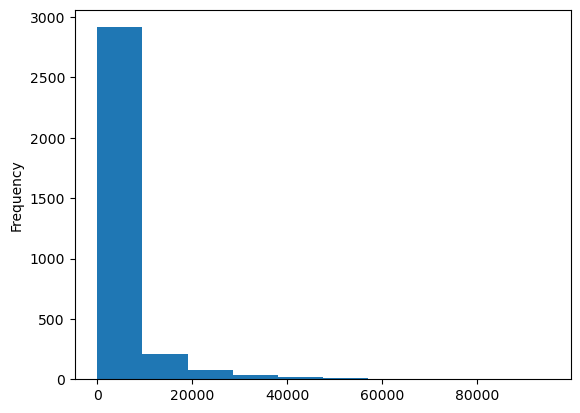

In [30]:
CA_prod["CA"].plot(kind="hist")

**Relevé de quelques données significatives concernant le CA des produits.**

In [31]:
CA_prod.sort_values(by=["CA"], ascending=False).iloc[
    :10
]  # les 10 premiers produits classés par CA

,CA
id_prod,
2_159,94893.50
2_135,69334.95
2_112,65407.76
2_102,60736.78
2_209,56971.86
1_395,54356.25
1_369,54025.48
2_110,53846.25
2_39,53060.85


In [32]:
CA_prod.sort_values(by=["CA"]).iloc[:10]  # les 10 derniers produits classés par CA

,CA
id_prod,
0_1539,0.99
0_1284,1.38
0_1653,1.98
0_541,1.99
0_807,1.99
0_1601,1.99
0_1728,2.27
0_1498,2.48
0_898,2.54


In [33]:
CA_prod.CA.describe()  # les indicateurs principaux de la variable CA

count     3266.000000
mean      3630.109146
std       7370.838410
min          0.990000
25%        233.832500
50%        797.220000
75%       3406.200000
max      94893.500000
Name: CA, dtype: float64

**CA par catégories**

In [34]:
CA_categ = trans_prod.groupby(by="categ").sum("price")
CA_categ.rename(columns={"price": "CA"}, inplace=True)
CA_categ.head()

,CA
categ,
0.0,4421938.76
1.0,4653722.69
2.0,2780275.02


## Analyse de tendance et saisonnalité

In [35]:
trans_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679332 entries, 0 to 679331
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   price       679332 non-null  float64       
 5   categ       679332 non-null  float64       
 6   _merge      679332 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), object(3)
memory usage: 31.7+ MB


In [36]:
trans_prod["year"] = trans_prod["date"].dt.strftime("%y")
trans_prod["month"] = trans_prod["date"].dt.strftime("%m")

# Conversion de la colonne 'date' en format 'y-%m'
trans_prod['periode'] = trans_prod['date'].dt.strftime('%y-%m')

trans_prod.head()

,id_prod,date,session_id,client_id,price,categ,_merge,year,month,periode
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,22,05,22-05
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,both,22,02,22-02
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,both,22,06,22-06
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,both,21,06,21-06
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,both,23,01,23-01


In [37]:
CA_periode = (
    trans_prod[["id_prod", "price", "periode"]]
    .groupby(by="periode")
    .sum("price")
)
CA_periode.rename(columns={"price": "CA"}, inplace=True)
CA_periode.head()

,CA
periode,
21-03,482530.52
21-04,476249.16
21-05,493023.39
21-06,484158.49
21-07,482875.36


<Axes: xlabel='periode'>

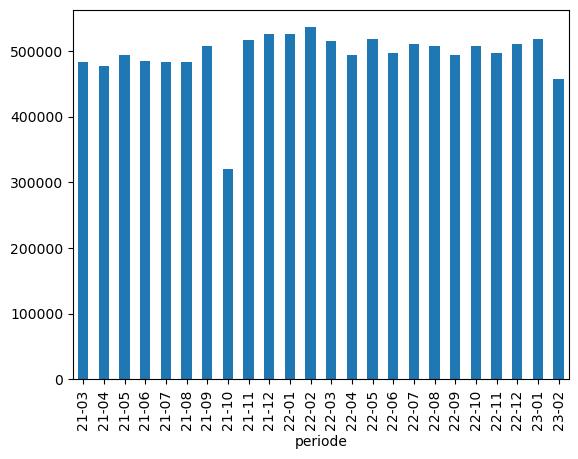

In [38]:
CA_periode["CA"].plot(kind="bar")

Octobre semble poser problème. Examen.

In [39]:
# Conversion de la colonne 'date' en type Date
trans_prod['date_courte'] = trans_prod['date'].dt.strftime('%y-%m-%d')

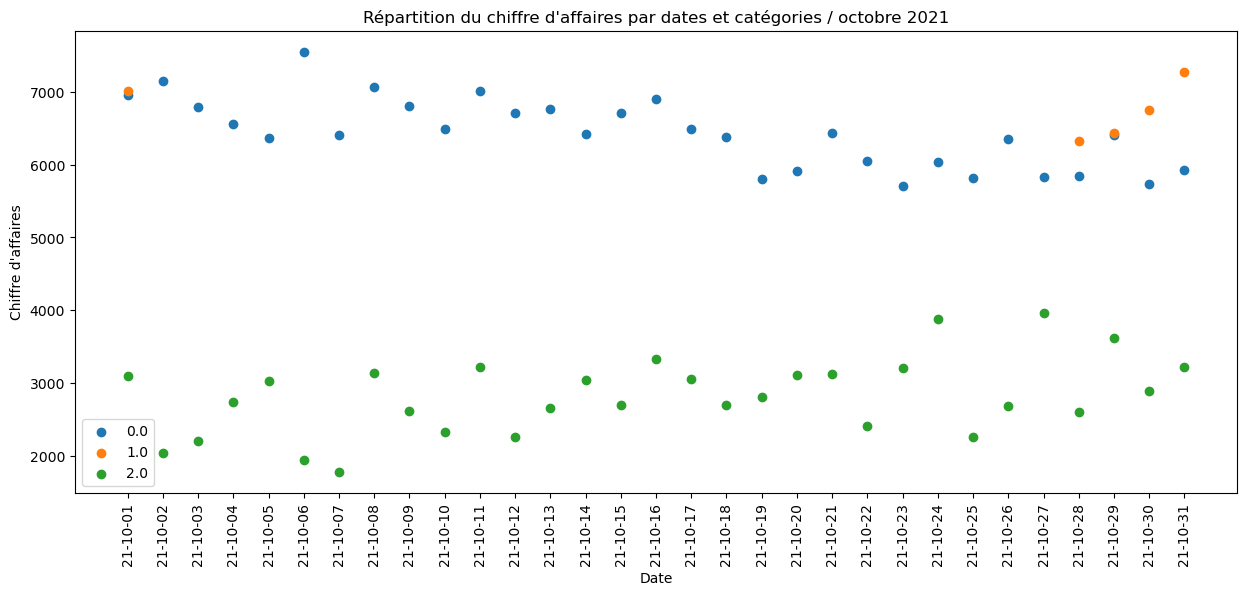

In [40]:
subset_data = trans_prod[trans_prod['periode'] == "21-10"]
grouped_data = subset_data.groupby(['categ', 'date_courte']).agg(CA=('price', 'sum')).reset_index()

# Plotting
plt.figure(figsize=(15, 6))
for category, group in grouped_data.groupby('categ'):
    plt.scatter(group['date_courte'], group['CA'], label=category)

plt.title("Répartition du chiffre d'affaires par dates et catégories / octobre 2021")
plt.xlabel('Date')
plt.ylabel("Chiffre d'affaires")
plt.xticks(rotation=90)  # Rotation des dates à 90 degrés
plt.legend()
plt.show()

In [41]:
filtered_data = trans_prod[(trans_prod['periode'] == "21-10") & (trans_prod['categ'] == 1.0)]
grouped_count = filtered_data.groupby('date_courte').size().reset_index(name='count')

# Affichage du résultat
print(grouped_count)

  date_courte  count
0    21-10-01    344
1    21-10-28    316
2    21-10-29    326
3    21-10-30    338
4    21-10-31    342


*Pas de transactions entre le 2 et le 27 octobre*

**Correction de la période d'octobre 2021 par la moyenne des mois de septembre et décembre**

In [42]:
CA_periode_corr = CA_periode.reset_index()

mask_1 = (trans_prod['categ'].isin([0, 2])) & (trans_prod['periode'] == "21-10")
mask_2 = (trans_prod['categ'] == 1) & (trans_prod['periode'].isin(["21-09", "21-11"]))

CA_periode_corr.loc[CA_periode_corr['periode'] == "21-10", 'CA'] = (
    sum(trans_prod[mask_1]['price']) + sum(trans_prod[mask_2]['price']) / 2
)
CA_periode_corr

,periode,CA
0,21-03,482530.520
1,21-04,476249.160
2,21-05,493023.390
3,21-06,484158.490
4,21-07,482875.360
5,21-08,482374.700
6,21-09,507360.560
7,21-10,508868.435
8,21-11,516267.630
9,21-12,525987.210


### Moyennes mobiles et décompositions

In [43]:
CA_periode_corr.count()

periode    24
CA         24
dtype: int64

In [44]:
serie_periodes = pd.date_range(start="2021-03", end="2023-02", freq="MS")
CA_periode_corr["date"] = serie_periodes
CA_periode_corr = CA_periode_corr.set_index("date")

In [45]:
CA_periode_corr

,periode,CA
date,,
2021-03-01,21-03,482530.520
2021-04-01,21-04,476249.160
2021-05-01,21-05,493023.390
2021-06-01,21-06,484158.490
2021-07-01,21-07,482875.360
2021-08-01,21-08,482374.700
2021-09-01,21-09,507360.560
2021-10-01,21-10,508868.435
2021-11-01,21-11,516267.630


In [46]:
CA_periode_corr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2021-03-01 to 2023-02-01
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   periode  24 non-null     object 
 1   CA       24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 576.0+ bytes


In [47]:
type(serie_periodes)

pandas.core.indexes.datetimes.DatetimeIndex

**SMA - Single Mobile Average**

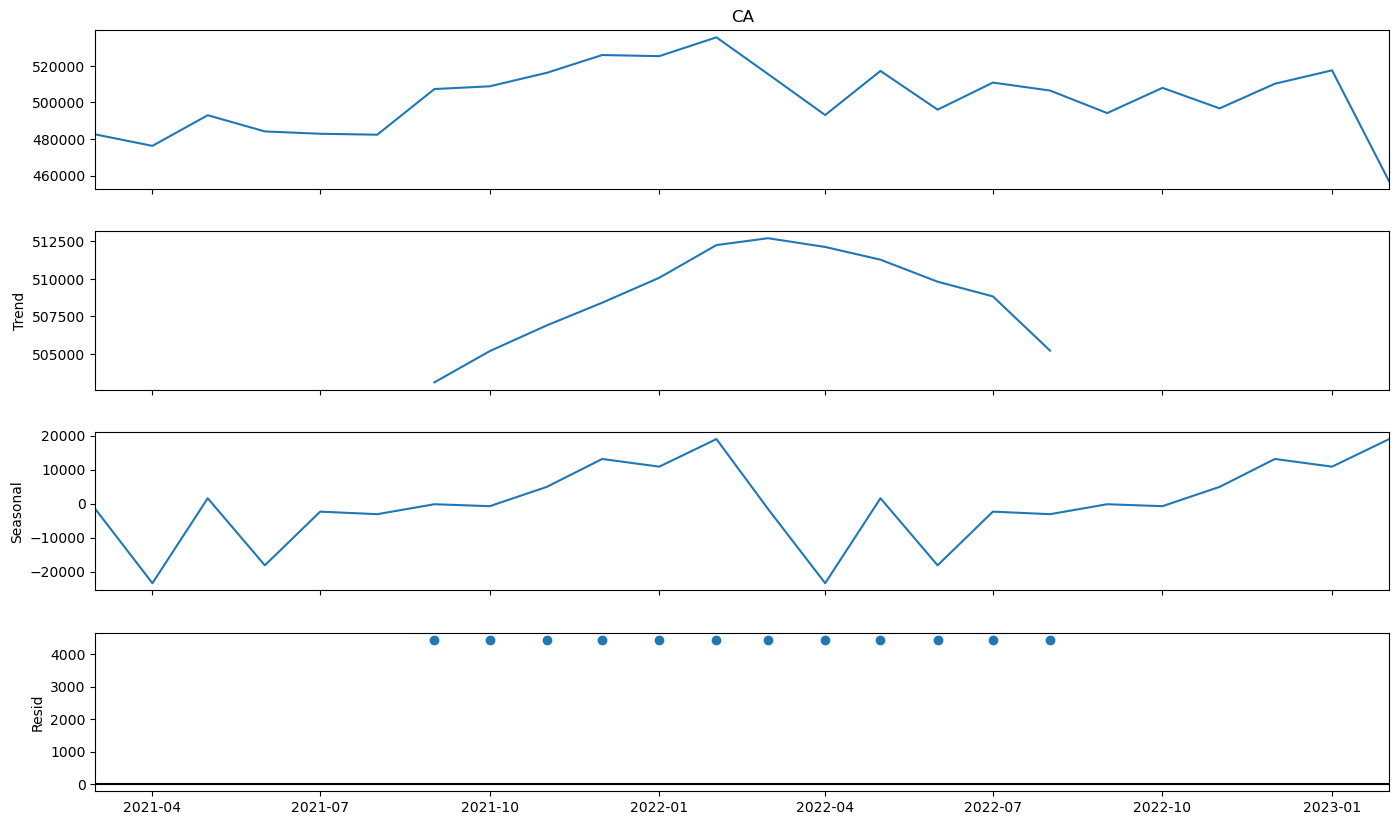

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

SMA_decomp = seasonal_decompose(CA_periode_corr["CA"])
fig = SMA_decomp.plot()
fig.set_size_inches((16, 9))
plt.show()

In [49]:
SMA_decomp.trend

date
2021-03-01              NaN
2021-04-01              NaN
2021-05-01              NaN
2021-06-01              NaN
2021-07-01              NaN
2021-08-01              NaN
2021-09-01    503106.977917
2021-10-01    505187.208750
2021-11-01    506902.154167
2021-12-01    508410.346250
2022-01-01    510075.146250
2022-02-01    512250.151667
2022-03-01    512709.167083
2022-04-01    512125.546875
2022-05-01    511277.898333
2022-06-01    509811.207917
2022-07-01    508832.615000
2022-08-01    505219.691667
2022-09-01              NaN
2022-10-01              NaN
2022-11-01              NaN
2022-12-01              NaN
2023-01-01              NaN
2023-02-01              NaN
Name: trend, dtype: float64

*Nous remarquons une saisonnalité marquée.*

## Analyse de la clientèle

Détermination de l'âge / positionnement en 2023

In [50]:
customers["age"] = 2023 - customers["birth"]
customers.head()

,client_id,sex,birth,age
0,c_4410,f,1967,56
1,c_7839,f,1975,48
2,c_1699,f,1984,39
3,c_5961,f,1962,61
4,c_5320,m,1943,80


In [51]:
customers.groupby("sex").agg({"age": ["max", "min", "mean", "std"]}).reset_index()

sex age                          
      max min       mean        std
0   f  94  19  45.005121  17.098242
1   m  94  19  44.408277  16.719656

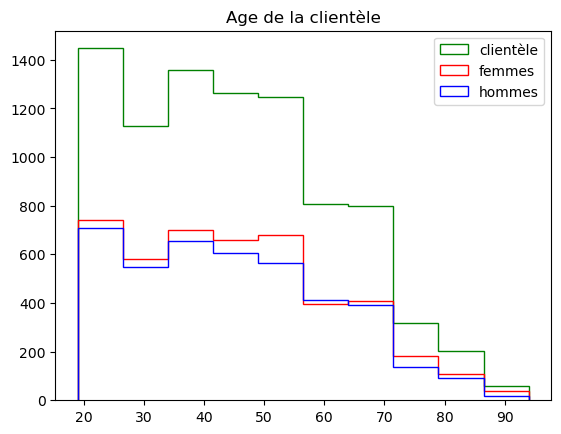

In [52]:
# subsets
men = customers[customers["sex"] == "m"]
women = customers[customers["sex"] == "f"]

plt.hist(customers["age"], histtype="step", color="green", label="clientèle")
plt.hist(women["age"], histtype="step", color="red", label="femmes")
plt.hist(men["age"], histtype="step", color="blue", label="hommes")
plt.title("Age de la clientèle")
plt.legend()
plt.show()

### Fusion des données trans_prod et customers

In [53]:
trans_prod = trans_prod.drop(columns="_merge")  # nettoyage préliminaire
custom_prod = pd.merge(
    trans_prod, customers, on="client_id", how="left", indicator=True
)
custom_prod.head()

,id_prod,date,session_id,client_id,price,categ,year,month,periode,date_courte,sex,birth,age,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,22,05,22-05,22-05-20,f,1986,37,both
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,22,02,22-02,22-02-02,m,1988,35,both
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,22,06,22-06,22-06-18,f,1968,55,both
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,21,06,21-06,21-06-24,m,2000,23,both
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,23,01,23-01,23-01-11,m,1980,43,both


In [54]:
custom_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679332 entries, 0 to 679331
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id_prod      679332 non-null  object        
 1   date         679332 non-null  datetime64[ns]
 2   session_id   679332 non-null  object        
 3   client_id    679332 non-null  object        
 4   price        679332 non-null  float64       
 5   categ        679332 non-null  float64       
 6   year         679332 non-null  object        
 7   month        679332 non-null  object        
 8   periode      679332 non-null  object        
 9   date_courte  679332 non-null  object        
 10  sex          679332 non-null  object        
 11  birth        679332 non-null  int64         
 12  age          679332 non-null  int64         
 13  _merge       679332 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 68.

In [55]:
custom_prod._merge.value_counts()  # Toutes les valeurs sont communes

_merge
both          679332
left_only          0
right_only         0
Name: count, dtype: int64

In [56]:
custom_prod = custom_prod.drop(columns="_merge")

In [57]:
CA_clients = custom_prod[["client_id", "price"]].groupby(by="client_id").sum("price")
CA_clients.rename(columns={"price": "CA"}, inplace=True)
CA_clients.head()

,CA
client_id,
c_1,558.18
c_10,1353.60
c_100,254.85
c_1000,2261.89
c_1001,1812.86


### Courbe de Lorenz et indice de Gini

**Courbe de Lorenz**

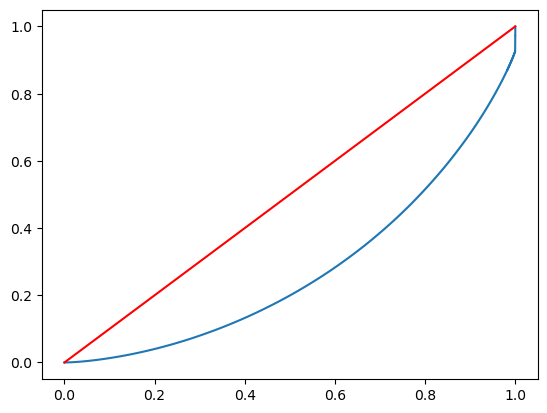

In [58]:
CA_cust = CA_clients["CA"].values
n = len(CA_cust)
lorenz = np.cumsum(np.sort(CA_cust)) / CA_cust.sum()
lorenz = np.append([0], lorenz)  # La courbe de Lorenz commence à 0

xaxis = np.linspace(0 - 1 / n, 1 + 1 / n, n + 1)
# Il y a un segment de taille n pour chaque individu,
# plus 1 segment supplémentaire d'ordonnée 0.
# Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis, lorenz, drawstyle="steps-post")
## line plot of equality
plt.plot([0, 1], [0, 1], color="r")
plt.show()

**Indice de Gini**

In [59]:
AUC = (lorenz.sum() - lorenz[-1] / 2 - lorenz[0] / 2) / n
# Surface sous la courbe de Lorenz.
# Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2,
# on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC  # surface entre la première bissectrice et le courbe de Lorenz
gini = 2 * S
gini

0.4463949039188958

*On compare les valeurs cumulées des déciles avec la droite d'équi-répartition, c'est une estimation de l'inégalité.*

*Elle est ici très marquée.*

<Axes: xlabel='client_id'>

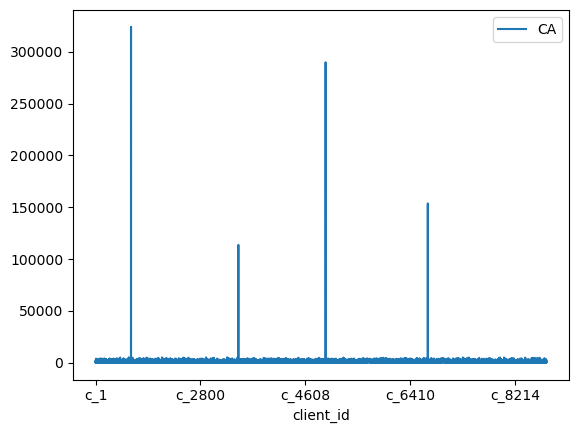

In [60]:
CA_clients.plot()

In [61]:
CA_clients[CA_clients["CA"] > 100000]  # Qui sont ces gros clients ?

,CA
client_id,
c_1609,324033.35
c_3454,113667.90
c_4958,289760.34
c_6714,153658.86


In [62]:
CA_clients.sort_values("CA", ascending=False).head(10)
# Les 10 premiers clients par CA / Le 5e est loin derrière.

,CA
client_id,
c_1609,324033.35
c_4958,289760.34
c_6714,153658.86
c_3454,113667.90
c_3263,5276.87
c_1570,5271.62
c_2899,5214.05
c_2140,5208.82
c_7319,5155.77


## Etude des relations entre clientèle et produits

**Existe-t-il une relation significative entre le genre de la clientèle et la catégorie de livres achetés ?** 

*Tableau de contingence*

In [63]:
sex_categ = pd.crosstab(custom_prod['sex'], custom_prod['categ'])

# Affichage de la table croisée
sex_categ

categ,0.0,1.0,2.0
sex,,,
f,206220,114899,17283
m,209460,112270,19200


*Pearson's Chi-squared Test*

In [64]:
from scipy.stats import chi2_contingency

# Utiliser chi2_contingency pour effectuer le test du chi-carré
chi2_stat, p_value, dof, expected = chi2_contingency(sex_categ)

# Affichage des résultats du test
print("Chi2 Stat:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index=sex_categ.index, columns=sex_categ.columns))

Chi2 Stat: 147.00253568681114
P-value: 1.1989607410166063e-32
Degrees of Freedom: 2
Expected Frequencies Table:
categ            0.0            1.0           2.0
sex                                              
f      207066.564449  113161.817694  18173.617857
m      208613.435551  114007.182306  18309.382143


Avec un p proche de zéro, au risque de 5%, nous peut donc rejeter l’hypothèse d’indépendance des variables : sexes et catégories sont corrélés.

**En quoi l'âge des clients est-il corrélé aux variables : montant total des achats, fréquence d'achat, taille du panier moyen, catégories des livres achetés ?**

*Détermination des variables à considérer dans l'analyse*

In [65]:
# Création du DataFrame cumul_clients
cumul_clients = custom_prod.groupby('client_id').agg(
    CA=('price', 'sum'),
    freq=('session_id', 'nunique'),
    avg_basket=('session_id', lambda x: x.size / x.nunique() if x.nunique() != 0 else 0),
    age=('age', 'max')
).reset_index()

# Affichage des 4 clients libraires hors normes
top_clients = cumul_clients.sort_values(by='CA', ascending=False).head(4)
top_clients

,client_id,CA,freq,avg_basket,age
677,c_1609,324033.35,10997,2.317723,43
4388,c_4958,289760.34,3851,1.349000,24
6337,c_6714,153658.86,2620,3.506489,55
2724,c_3454,113667.90,5573,1.215324,54


Les 4 clients outliers (libraires) précédemment repérés ont une incidence très forte et relève d'un statut très particulier. Ils sont à dissocier de l'analyse des relations entre les variables étudiées.

In [66]:
# Suppression des outliers repérés
cumul_clients_wo_outliers = cumul_clients[cumul_clients['CA'] < 100000]

# Affichage des valeurs synthétiques sur les clients hors libraires / CA
summary_statistics = cumul_clients_wo_outliers.describe()
summary_statistics

,CA,freq,avg_basket,age
count,8596.000000,8596.000000,8596.000000,8596.000000
mean,1276.735228,37.142159,1.979770,44.739646
std,954.412396,30.889449,0.665370,16.910542
min,6.310000,1.000000,1.000000,19.000000
25%,547.630000,15.000000,1.409091,31.000000
50%,1026.930000,26.000000,1.958333,44.000000
75%,1779.075000,50.000000,2.421053,57.000000
max,5276.870000,165.000000,8.200000,94.000000


**Matrice de corrélation entre les variables examinées**

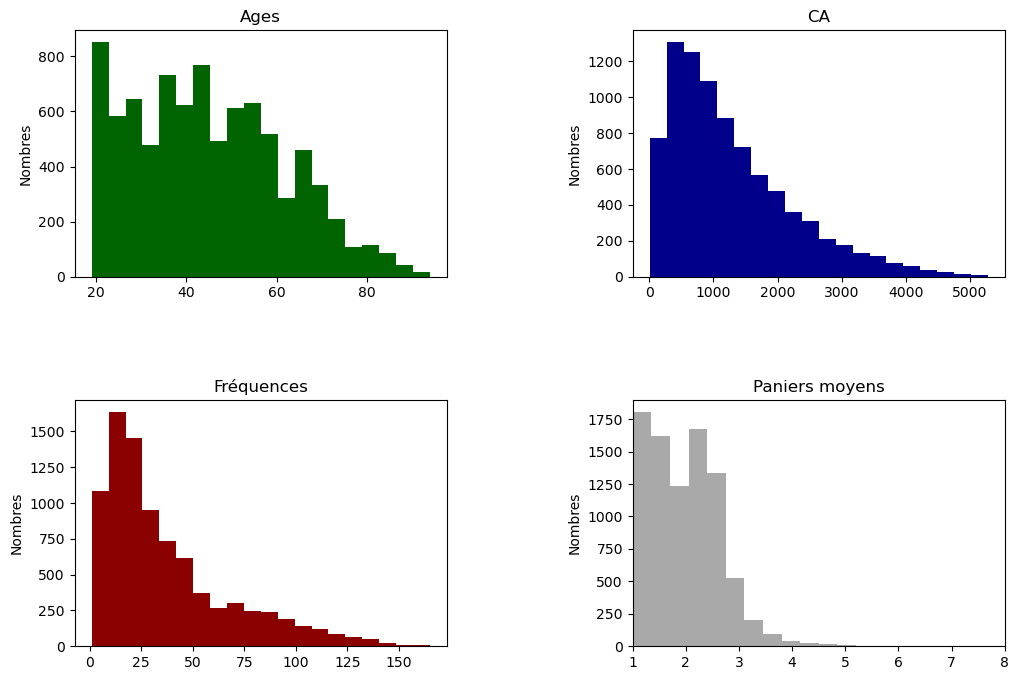

In [67]:
# Définir la disposition en sous-graphes
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Histogramme pour l'âge
plt.subplot(2, 2, 1)
plt.hist(cumul_clients_wo_outliers['age'], color="darkgreen", bins=20)
plt.title("Ages")
plt.ylabel("Nombres")

# Histogramme pour le CA
plt.subplot(2, 2, 2)
plt.hist(cumul_clients_wo_outliers['CA'], color="darkblue", bins=20)
plt.title("CA")
plt.ylabel("Nombres")

# Histogramme pour la fréquence
plt.subplot(2, 2, 3)
plt.hist(cumul_clients_wo_outliers['freq'], color="darkred", bins=20)
plt.title("Fréquences")
plt.ylabel("Nombres")

# Histogramme pour les paniers moyens
plt.subplot(2, 2, 4)
plt.hist(cumul_clients_wo_outliers['avg_basket'], color="darkgrey", bins=20, range=(1, 8))
plt.title("Paniers moyens")
plt.ylabel("Nombres")
plt.xlim(1, 8)


# Afficher les graphiques
plt.show()

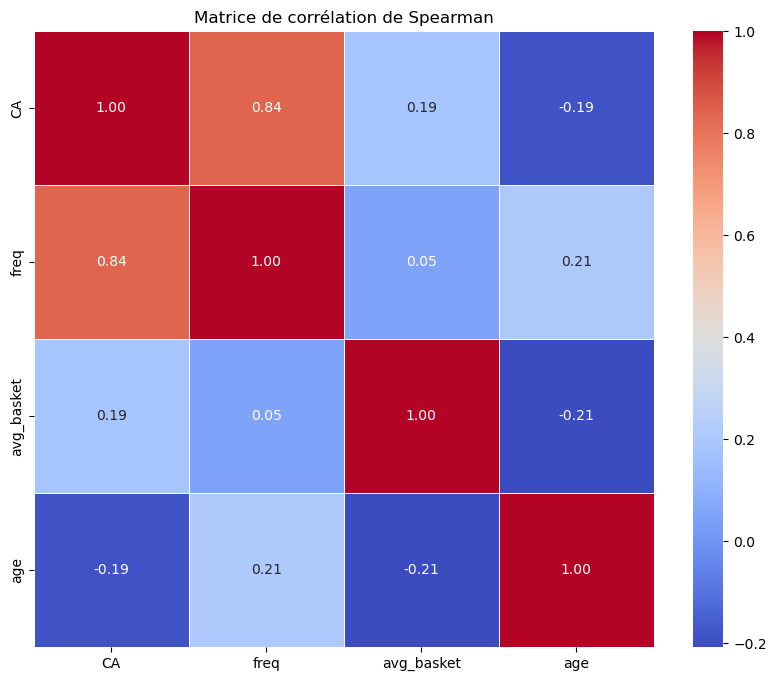

In [68]:
import seaborn as sns

# Sélectionner uniquement les colonnes numériques pour le calcul de la corrélation
numeric_columns = cumul_clients_wo_outliers.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = cumul_clients_wo_outliers[numeric_columns].corr(method='spearman')

# Tracé de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de corrélation de Spearman')
plt.show()

Les coefficients de corrélation en lien avec l'âge sont tous significatifs, certains corrélés négativement à l'âge, d'autres positivement.

Les régressions linéaires sont-elles un bon modèle de prédiction ?

In [69]:
import scipy.stats as stats
stats.pearsonr(cumul_clients_wo_outliers['age'],cumul_clients_wo_outliers['CA'])

PearsonRResult(statistic=-0.18832959294094226, pvalue=1.8496268413420118e-69)

**Régressions linéaires portant sur les variables numériques**

**Sur l'âge et les données calculées**

In [70]:
import statsmodels.api as sm

# Régression linéaire
X = cumul_clients_wo_outliers[['age']]
y = cumul_clients_wo_outliers['CA']
X = sm.add_constant(X)  # Ajouter une colonne constante pour l'intercept

model = sm.OLS(y, X).fit()

# Affichage du résumé
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CA   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     316.0
Date:                Tue, 26 Dec 2023   Prob (F-statistic):           1.85e-69
Time:                        08:55:02   Log-Likelihood:                -71019.
No. Observations:                8596   AIC:                         1.420e+05
Df Residuals:                    8594   BIC:                         1.421e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1752.2781     28.597     61.274      0.000    1696.220    1808.336
age          -10.6291      0.598    -17.777      0.000     -11.801      -9.457
==============================================================================
Omnibus:                     1371.423   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2168.997
Skew:                           1.111   Prob(JB):                         0.00
Kurtosis:                       4.057   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Au risque de 5%, l'hypothèse nulle est rejetée. Les variables sont corrélées, mais le coefficient de détermination R2 est très faible, le modèle linéaire représente imparfaitement le rapport entre les variables.

**Vérification de la normalité des résidus**

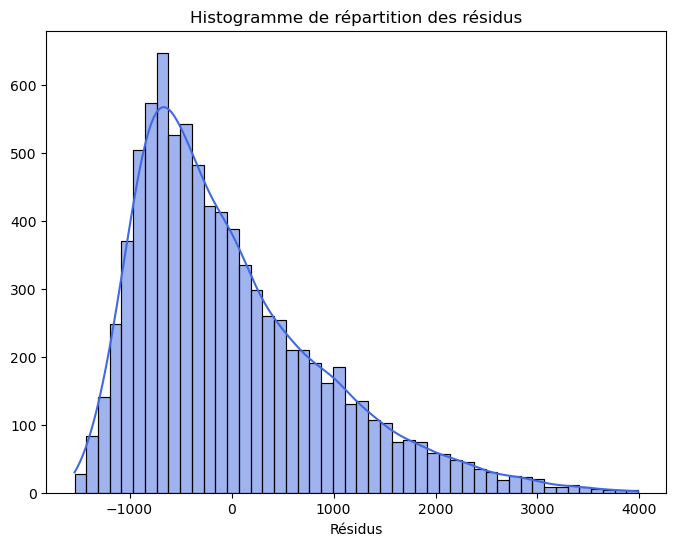

In [71]:
import seaborn as sns

# Calcul des résidus
residuals = cumul_clients_wo_outliers['CA'] - model.predict(sm.add_constant(cumul_clients_wo_outliers['age']))

# Tracé de l'histogramme des résidus
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="royalblue")
plt.title("Histogramme de répartition des résidus")
plt.xlabel("Résidus")
plt.ylabel("")
plt.show()

On se rapproche très vaguement de la forme classique : centrée et symétrique.

**Test de Kolmogorov-Smirnov**

In [72]:
from scipy.stats import kstest, norm

# Test de Kolmogorov-Smirnov
ks_statistic, ks_p_value = kstest(residuals, 'norm')

# Affichage des résultats
print(f"Statistique de test de Kolmogorov-Smirnov : {ks_statistic}")
print(f"p-valeur : {ks_p_value}")

Statistique de test de Kolmogorov-Smirnov : 0.5952293805302471
p-valeur : 0.0


*Le test de normalité rejette l'hypothèse nulle : la distribution des résidus ne suit pas une loi normale.*

**Vérification de l'homoscédasticité (variance constante des résidus)**

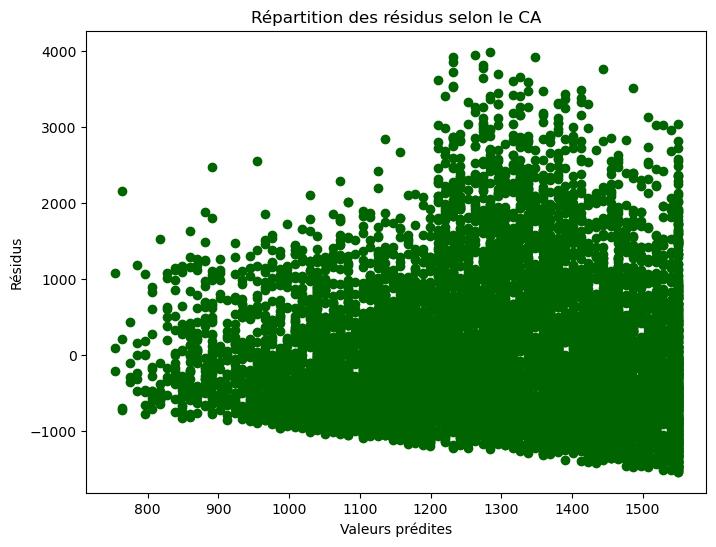

In [73]:
# Tracé du graphique de dispersion
plt.figure(figsize=(8, 6))
plt.scatter(model.predict(sm.add_constant(cumul_clients_wo_outliers['age'])), residuals, color="darkgreen")
plt.title("Répartition des résidus selon le CA")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.show()

La répartition des résidus est inégale, ce que confirme le **Test de Breusch-Pagan**

In [74]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Ajout d'une colonne constante à l'exogène
exog_with_constant = sm.add_constant(cumul_clients_wo_outliers[['age']])

# Test de Breusch-Pagan
bp_test_statistic, bp_p_value, _, _ = sms.het_breuschpagan(residuals, exog_het=exog_with_constant)
print(f"Statistique de test de Breusch-Pagan : {bp_test_statistic}")
print(f"p-valeur : {bp_p_value}")

Statistique de test de Breusch-Pagan : 142.6244246080587
p-valeur : 7.101488804581164e-33


Au risque de 5% nous rejetons l'hypothèse nulle : il y a hétéroscédasticité. Pas de normalité de distribution et hétéroscedasticité des résidus, le modèle linéaire étudié est mal assuré.

**Age et moyenne du panier ou âge et fréquence**

L'approche d'une régression linéaire pour les deux autres variables aboutissent aux mêmes conclusions : pentes et coefficients de détermination R2 très faibles et non vérification des conditions du modèle. L'approche par la régression linéaire n'offre pas d'enseignement complémentaire aux corrélations déjà relevées.

**Relations entre les âges et les catégories**

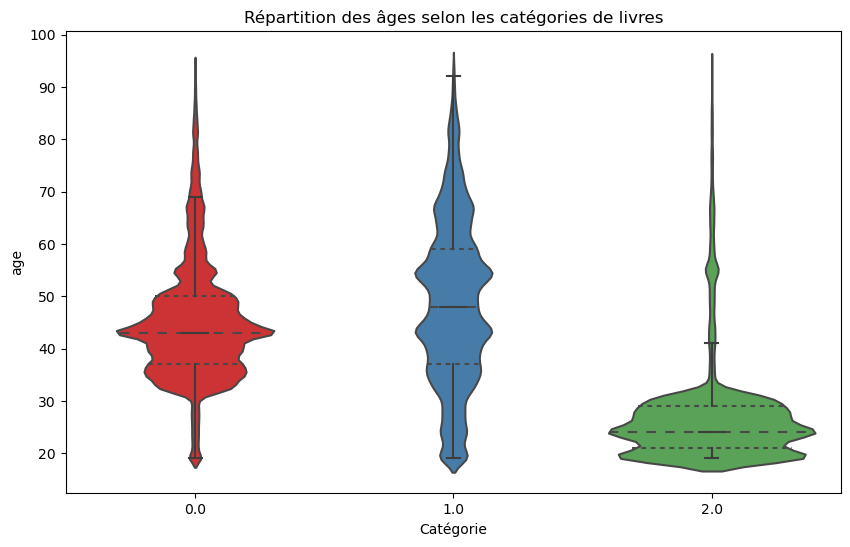

In [75]:
# Tracer le graphique avec seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(x='categ', y='age', data=custom_prod, inner='quartile', palette='Set1')
sns.boxplot(x='categ', y='age', data=custom_prod, width=0.1, showfliers=False)

# Ajouter un titre au graphique
plt.title("Répartition des âges selon les catégories de livres")
plt.xlabel("Catégorie")

# Afficher le graphique
plt.show()

Il existe une tendance forte des plus jeunes sur la catégorie 2. On constate beaucoup de valeurs extrêmes et d'amplitude pour chacune des catégories. 
Les conditions sont-elles réunies pour réaliser une analyse des variances ?

*Examen des distributions des catégories en fonction de l'âge*

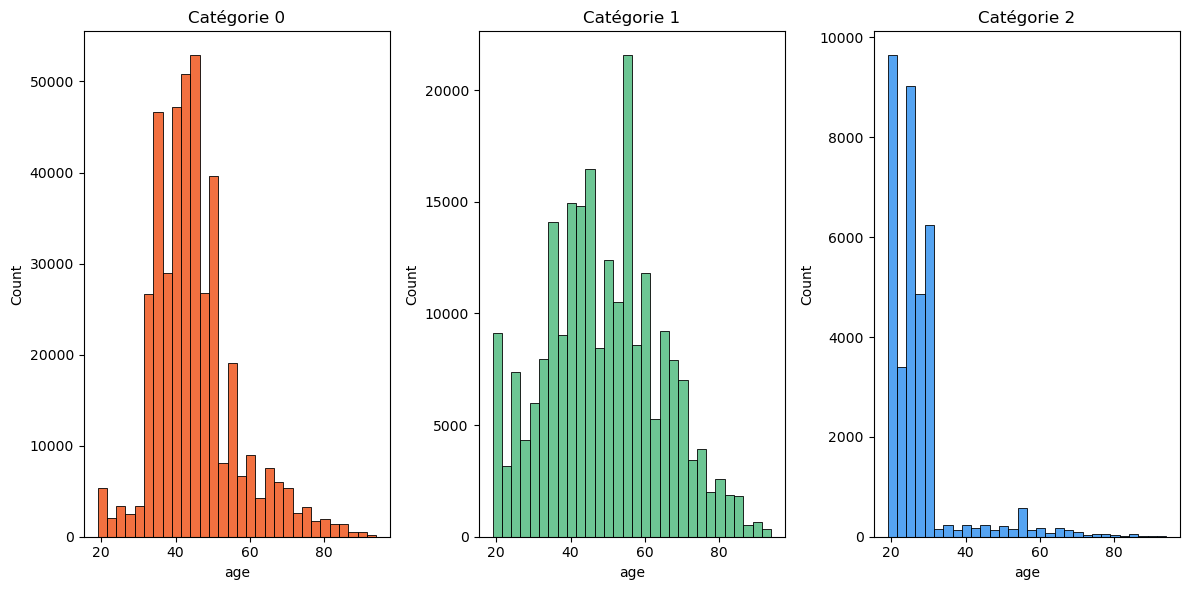

In [76]:
# Tracer les histogrammes avec seaborn
plt.figure(figsize=(12, 6))

# Catégorie 0
plt.subplot(1, 3, 1)
sns.histplot(data=custom_prod[custom_prod['categ'] == 0.0], x='age', color='#EE4000', bins=30)
plt.title('Catégorie 0')

# Catégorie 1
plt.subplot(1, 3, 2)
sns.histplot(data=custom_prod[custom_prod['categ'] == 1.0], x='age', color='#3CB371', bins=30)
plt.title('Catégorie 1')

# Catégorie 2
plt.subplot(1, 3, 3)
sns.histplot(data=custom_prod[custom_prod['categ'] == 2.0], x='age', color='#1C86EE', bins=30)
plt.title('Catégorie 2')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les histogrammes
plt.show()

<Axes: xlabel='age', ylabel='Density'>

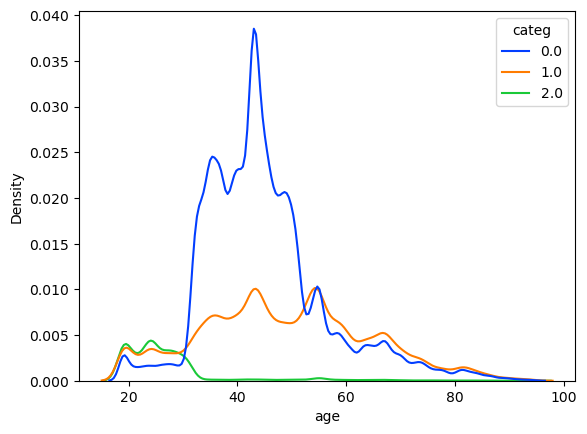

In [77]:
sns.kdeplot(data=custom_prod, x="age", hue="categ", palette="bright")

La distribution de la catégorie 2 n'est pas gaussienne. La distribution de la catégorie 1 est celle qui se rapproche le plus d'une loi normale. Test de l'homogénéité de la variance entre les groupes.

In [78]:
from scipy.stats import levene

# Effectuer le test de Levene, 
levene_test_statistic, levene_p_value = levene(custom_prod[custom_prod['categ'] == 0.0]['age'], custom_prod[custom_prod['categ'] == 1.0]['age'], custom_prod[custom_prod['categ'] == 2.0]['age'])

# Afficher les résultats
print(f"Statistique de test de Levene : {levene_test_statistic}")
print(f"p-valeur : {levene_p_value}")

Statistique de test de Levene : 26091.730839883516
p-valeur : 0.0


Pas d'homogénéité des variances

*Les distributions des trois catégories sont-elles gaussiennes ?*

In [79]:
# Test de Kolmogorov-Smirnov
ks_statistic, ks_p_value = kstest(custom_prod[custom_prod['categ'] == 0.0]['age'], 'norm')

# Affichage des résultats
print(f"Statistique de test de Kolmogorov-Smirnov : {ks_statistic}")
print(f"p-valeur : {ks_p_value}")

Statistique de test de Kolmogorov-Smirnov : 1.0
p-valeur : 0.0


In [80]:
# Test de Kolmogorov-Smirnov
ks_statistic, ks_p_value = kstest(custom_prod[custom_prod['categ'] == 1.0]['age'], 'norm')

# Affichage des résultats
print(f"Statistique de test de Kolmogorov-Smirnov : {ks_statistic}")
print(f"p-valeur : {ks_p_value}")

Statistique de test de Kolmogorov-Smirnov : 1.0
p-valeur : 0.0


In [81]:
# Test de Kolmogorov-Smirnov
ks_statistic, ks_p_value = kstest(custom_prod[custom_prod['categ'] == 2.0]['age'], 'norm')

# Affichage des résultats
print(f"Statistique de test de Kolmogorov-Smirnov : {ks_statistic}")
print(f"p-valeur : {ks_p_value}")

Statistique de test de Kolmogorov-Smirnov : 1.0
p-valeur : 0.0


Aucune distribution ne suit une loi normale, pas d’homogénéité des variances, les tests d'analyse paramétrique de la variance Anova ou Welch Anova ne sont pas adaptés.

*Recours à un test non paramétrique : test de Kruskal-Wallis.*

In [82]:
from scipy.stats import kruskal

# Effectuer le test de Kruskal-Wallis
kruskal_statistic, kruskal_p_value = kruskal(custom_prod[custom_prod['categ'] == 0.0]['age'], custom_prod[custom_prod['categ'] == 1.0]['age'], custom_prod[custom_prod['categ'] == 2.0]['age'])

# Afficher les résultats
print(f"Statistique de test de Kruskal-Wallis : {kruskal_statistic}")
print(f"p-valeur : {kruskal_p_value}")

Statistique de test de Kruskal-Wallis : 79350.86927924873
p-valeur : 0.0


Au risque de 5%, nous pouvons rejeter l'hypothèse d'indépendance des variables, elle sont corrélées.

*Données synthétiques portant sur âges et catégories*

In [83]:
# Groupement par 'categ' et calcul des statistiques
summary_stats = custom_prod.groupby('categ').agg(
    age_max=pd.NamedAgg(column='age', aggfunc='max'),
    age_min=pd.NamedAgg(column='age', aggfunc='min'),
    age_mean=pd.NamedAgg(column='age', aggfunc='mean'),
    age_median=pd.NamedAgg(column='age', aggfunc='median'),
    age_sd=pd.NamedAgg(column='age', aggfunc='std'),
    count=pd.NamedAgg(column='age', aggfunc='count')
).reset_index()

# Renommer les colonnes si nécessaire
summary_stats = summary_stats.rename(columns={
    'age_max': 'age_max',
    'age_min': 'age_min',
    'age_mean': 'age_mean',
    'age_median': 'age_median',
    'age_sd': 'age_sd',
    'count': 'count'
})

# Afficher les statistiques récapitulatives
summary_stats

,categ,age_max,age_min,age_mean,age_median,age_sd,count
0,0.0,94,19,44.897616,43.0,11.209482,415680
1,1.0,94,19,48.651238,48.0,15.495910,227169
2,2.0,94,19,26.948031,24.0,9.798143,36483


La catégorie 2 se détache nettement par son public sensiblement plus jeune. Les moyennes d'âges sont similaires entre les catégories 0 et 1. Les mêmes âges extrêmes sont présents sur les 3 catégories.

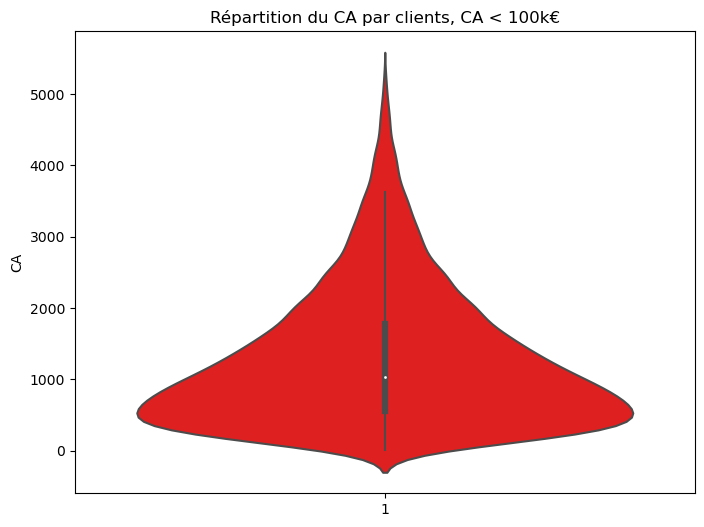

In [90]:
### Filtrer les données pour CA < 100000
filtered_data = CA_clients[CA_clients['CA'] < 100000].copy()  # Assurez-vous de créer une copie

# Ajouter une colonne constante pour l'ensemble des données
filtered_data['constant'] = 1

# Tracer le graphique avec seaborn
plt.figure(figsize=(8, 6))
# sns.boxplot(x='constant', y='CA', data=filtered_data, width=0.1, color='grey')
sns.violinplot(x='constant', y='CA', data=filtered_data, color='red', inner="box")

# Ajouter des titres et des étiquettes d'axe
plt.title("Répartition du CA par clients, CA < 100k€")
plt.xlabel('')
plt.ylabel('CA')

# Afficher le graphique
plt.show()

Une médiane aux alentours de 1200€ de CA, une évidente majorité de petits clients.

*Données synthétiques portant sur âges et sexes*

In [85]:
# Groupement par 'sex' et calcul des statistiques
summary_stats = custom_prod.groupby('sex').agg(
    age_max=pd.NamedAgg(column='age', aggfunc='max'),
    age_min=pd.NamedAgg(column='age', aggfunc='min'),
    age_mean=pd.NamedAgg(column='age', aggfunc='mean'),
    age_median=pd.NamedAgg(column='age', aggfunc='median'),
    age_sd=pd.NamedAgg(column='age', aggfunc='std'),
    count=pd.NamedAgg(column='age', aggfunc='count')
).reset_index()

# Renommer les colonnes si nécessaire
summary_stats = summary_stats.rename(columns={
    'age_max': 'age_max',
    'age_min': 'age_min',
    'age_mean': 'age_mean',
    'age_median': 'age_median',
    'age_sd': 'age_sd',
    'count': 'count'
})

# Afficher les statistiques récapitulatives
summary_stats

,sex,age_max,age_min,age_mean,age_median,age_sd,count
0,f,94,19,45.747977,44.0,13.890003,338402
1,m,94,19,44.633890,43.0,13.230696,340930


Hommes et femmes sont très proches sur toutes les valeurs d'âges et même en nombre.

*Pyramide des âges / comparaison hommes et femmes*

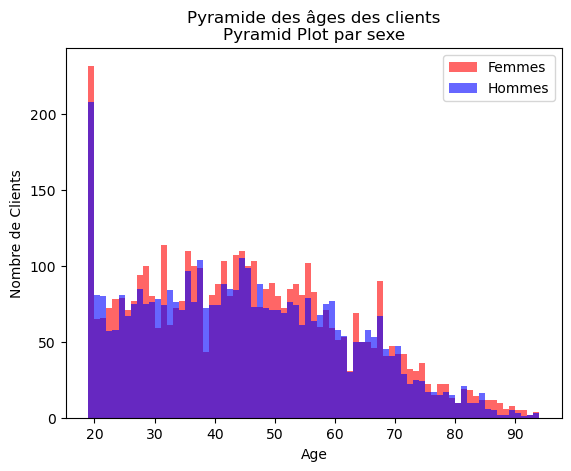

In [86]:
females = customers[customers['sex'] == 'f']['age']
males = customers[customers['sex'] == 'm']['age']

bins = np.arange(customers['age'].min(), customers['age'].max() + 1, 1)

fig, ax = plt.subplots()

ax.hist(females, bins=bins, label='Femmes', alpha=0.6, color='red')
ax.hist(males, bins=bins, label='Hommes', alpha=0.6, color='blue')

ax.set_xlabel('Age')
ax.set_ylabel('Nombre de Clients')
ax.set_title('Pyramide des âges des clients\nPyramid Plot par sexe')

plt.legend(loc='upper right')
plt.show()

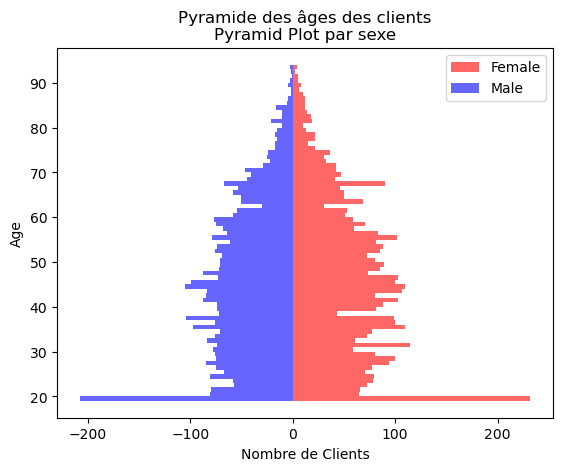

In [87]:
# Convertir la colonne sex en variable catégorielle
customers['sex'] = customers['sex'].astype('category')

females = customers[customers['sex'] == 'f']['age']
males = customers[customers['sex'] == 'm']['age']

# Utiliser np.arange pour définir des intervalles plus petits
bins = np.arange(customers['age'].min(), customers['age'].max() + 1, 1)

fig, ax = plt.subplots()

# Utiliser l'orientation horizontale et la couleur rose pour les femmes
ax.hist(females, bins=bins, label='Female', alpha=0.6, color='red', orientation='horizontal')
# Utiliser l'orientation horizontale, la couleur bleu clair et l'argument weights pour les hommes
ax.hist(males, bins=bins, label='Male', alpha=0.6, color='blue', orientation='horizontal', weights=-np.ones(len(males)))

ax.set_xlabel('Nombre de Clients')
ax.set_ylabel('Age')
ax.set_title('Pyramide des âges des clients\nPyramid Plot par sexe')

plt.legend(loc='upper right')
plt.show()

In [92]:
customers.groupby("age").count()

,client_id,sex,birth
age,,,
19,440,440,440
20,146,146,146
21,146,146,146
22,129,129,129
23,136,136,136
...,...,...,...
90,8,8,8
91,6,6,6
92,4,4,4
